# Laboratory: YRBSS

### The data
Every two years, the Centers for Disease Control and Prevention conduct the Youth Risk Behavior Surveillance System (YRBSS) survey, where it takes data from high schoolers (9th through 12th grade), to analyze health patterns. You will work with a selected group of variables from a random sample of observations during one of the years the YRBSS was conducted.

Let's define the paths of the datasets.

In [2]:
%matplotlib inline

from pathlib import Path 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

YRBSS_SAMP_PATH = Path("../datasets/yrbss_samp.csv")
YRBSS_PATH = Path("../datasets/yrbss.csv")

And read them in.

In [3]:
yrbss_samp_df = pd.read_csv(YRBSS_SAMP_PATH)
yrbss_df = pd.read_csv(YRBSS_PATH)

### Exercise 1 - What are the cases in this data set? How many cases are there in our sample?

In [4]:
print(f"Rows: {yrbss_df.shape[0]}")
print(f"Columns: {yrbss_df.shape[1]}")
for col in yrbss_df.columns:
    print(f"|- {col} <{yrbss_df[col].dtype}> ({yrbss_df[col].nunique()} cases) -|")

Rows: 13583
Columns: 13
|- age <float64> (7 cases) -|
|- gender <object> (2 cases) -|
|- grade <object> (5 cases) -|
|- hispanic <object> (2 cases) -|
|- race <object> (5 cases) -|
|- height <float64> (34 cases) -|
|- weight <float64> (239 cases) -|
|- helmet_12m <object> (6 cases) -|
|- text_while_driving_30d <object> (8 cases) -|
|- physically_active_7d <float64> (8 cases) -|
|- hours_tv_per_school_day <object> (7 cases) -|
|- strength_training_7d <float64> (8 cases) -|
|- school_night_hours_sleep <object> (7 cases) -|


## Exploratory data analysis

You will first start with analyzing the weight of the participants in kilograms: `weight`.

We can use `skimpy`'s `skim` function to get an overview of the data.

In [5]:
# Run it to install skimpy

# ! pip install skimpy

In [6]:
from skimpy import skim 

skim(yrbss_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 13583  │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %   ┃ mean   ┃ sd   ┃ p0   ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ age                        │     77 │   0.57 │     16 │  1.3 │   12 │   15 │   16 │   17 │    18 │   ▂▅▅▇  │  │
│ │ height                     │   1004 │   7.39 │    1.7 │  0.1 │  1.3 │  1.6 │  1.7 │  1.8 │   2.1 │   ▁▇▇▂  │  │
│ │ weight                     │   1004 │   7.39 │     68 │   17 │   30 │   56 │   64 │   76 │   180 │   ▃▇▂   │  │
│ │ physically_active_7d       │    273 │   2.01 │    3.9 │  2.6 │    0 │    2 │    4 │    7 │     7 │ ▆▂▃▂▃▇  │  │
│ │ strength_training_7d       │   1176 │   8.66 │    2.9 │  2.6 │    0 │    0 │    3 │    5 │     7 │ ▇▂▃▂▂▅  │  │
│ └────────────────────────────┴────────┴────────┴────────┴──────┴──────┴──────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ gender                              │       12 │       0.09 │                       1 │              13571 │  │
│ │ grade                               │       79 │       0.58 │                    0.99 │              13504 │  │
│ │ hispanic                            │      231 │        1.7 │                    0.98 │              13352 │  │
│ │ race                                │     2805 │      20.65 │                     1.7 │              23047 │  │
│ │ helmet_12m                          │      311 │       2.29 │                     1.7 │              22956 │  │
│ │ text_while_driving_30d              │      918 │       6.76 │                     1.6 │              21957 │  │
│ │ hours_tv_per_school_day             │      338 │       2.49 │                     1.2 │              16925 │  │
│ │ school_night_hours_sleep            │     1248 │       9.19 │                    0.91 │              12335 │  │
│ └─────────────────────────────────────┴──────────┴────────────┴─────────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Exercise 2 - How many observations are we missing weights from?

We are missing `weight` for 1,004 observations.

Next, consider the possible relationship between a high schooler’s weight and their physical activity. Plotting the data is a useful first step because it helps us quickly visualize trends, identify strong associations, and develop research questions.

First, let’s create a new variable `physical_3plus`, which will be coded as either “yes” if the student is physically active for at least 3 days a week, and “no” if not.

In [7]:
yrbss_df["physical_3plus"] = yrbss_df["physically_active_7d"].apply(lambda x: "yes" if x >= 3 else "no")

### Exercise 3 - Make a side-by-side violin plots of physical_3plus and weight. Is there a relationship between these two variables? What did you expect and why?

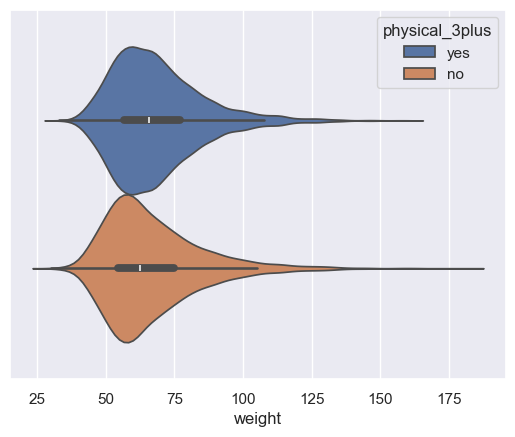

In [8]:
sns.set_theme()

fig, ax = plt.subplots()
sns.violinplot(x="weight", hue="physical_3plus", data=yrbss_df)

plt.show()

The box plots show how the medians of the two distributions compare, but we can also compare the means of the distributions using the following to first group the data by the `physical_3plus` variable, and then calculate the mean `weight` in these groups using the mean function while ignoring missing values.

In [9]:
yrbss_df.groupby("physical_3plus")["weight"].describe()

,count,mean,std,min,25%,50%,75%,max
physical_3plus,,,,,,,,
no,4237.0,66.839452,17.649229,29.94,54.43,62.60,74.84,180.99
yes,8342.0,68.448470,16.478322,33.11,56.70,65.77,77.11,160.12


## Inference

### Exercise 4 - Are all conditions necessary for inference satisfied? 

Randomness is met, as the observations are independent. Sample size is big enough to meet the conditions for inference, and the distribution for the central limit theorem is approximately normal.

### Exercise 5 - Write the hypotheses for testing if the average weights are different for those who exercise at least times a week and those who don’t.

$H_0 : \mu_y = \mu_n$ and $H_A : \mu_y \neq \mu_n$.

Next, we will work through creating a permutation distribution.

But first, we need to initialize the test, which we will save as `obs_diff`.

In [10]:
import scipy.stats as sps

w = yrbss_df["weight"].values
p3p = yrbss_df["physical_3plus"].values

w_yes = w[p3p == "yes"]
w_no = w[p3p == "no"]

w_yes = w_yes[~np.isnan(w_yes)]
w_no = w_no[~np.isnan(w_no)]

def statistic(x, y):
    return sps.ttest_ind(x, y, nan_policy="omit").statistic

obs_diff = sps.permutation_test((w_yes, w_no), statistic=statistic)

We will save the permutation distribution as `null_dist`.

In [11]:
null_dist = sps.permutation_test(
    (w_yes, w_no), 
    statistic=statistic,
    permutation_type="independent",
    n_resamples=1000
)

[]

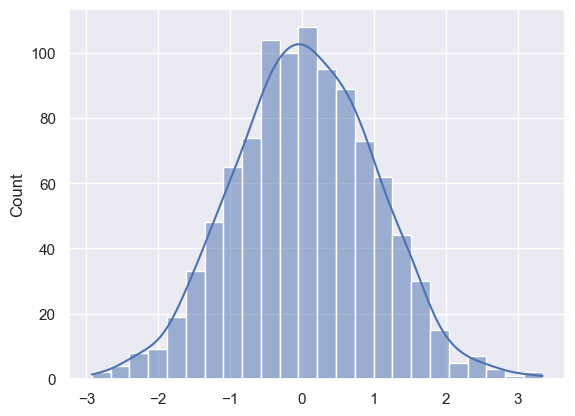

In [12]:
sns.histplot(null_dist.null_distribution, kde=True)

plt.plot()

### Exercise 6 - Add a vertical red line to the plot above, demonstrating where the observed difference in means (`obs_diff`) falls on the distribution.

[]

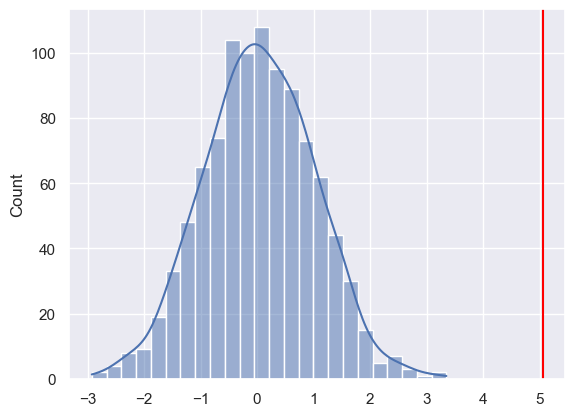

In [13]:
ax = sns.histplot(null_dist.null_distribution, kde=True)
ax.axvline(x = null_dist.statistic, color = "red")

plt.plot()

### Exercise 7 - How many of these `null_dist` permutations have a difference at least as large (or larger) as `obs_diff`?

We can see that none of these permutations have a difference at least as large as the observed difference in means.

The p-value is:

In [14]:
null_dist.pvalue

0.001998001998001998

### Exercise 8 - What warning message do you get? Why do you think you get this warning message?

I get none.

### Construct and record a confidence interval for the difference between the weights of those who exercise at least three times a week and those who don’t, and interpret this interval in context of the data.

In [15]:
ci_yes = w_yes.mean() - 1.96 * w_yes.std() / np.sqrt(len(w_yes)), w_yes.mean() + 1.96 * w_yes.std() / np.sqrt(len(w_yes))
ci_no = w_no.mean() - 1.96 * w_no.std() / np.sqrt(len(w_no)), w_no.mean() + 1.96 * w_no.std() / np.sqrt(len(w_no))

for ci in (ci_yes, ci_no):
    print(f"{'ci_yes' if ci == ci_yes else 'ci_no'}: {ci}")

ci_yes: (68.09487391129431, 68.80206687029283)
ci_no: (66.3080771846954, 67.37082770083683)


In about 95% of the cases, the weight falls within the confidence interval.

[]

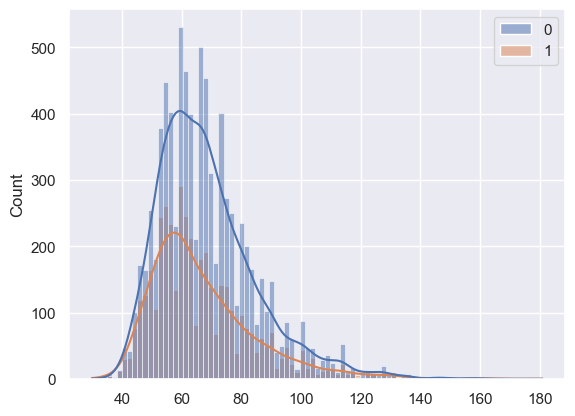

In [16]:
sns.histplot((w_yes, w_no), kde=True)

plt.plot()

### Exercise 10 - Calculate a 95% confidence interval for the average height in meters (height) and interpret it in context.

Let's calculate the 95% confidence interval for the average height in meters.

In [22]:
heights = yrbss_df["height"].dropna().values
h_mean, h_stderr = heights.mean(), heights.std()

ci_95 = sps.norm.interval(0.95, loc=h_mean, scale=h_stderr)

ci_95

(1.4860462719288419, 1.8964356423727724)

We can interpret it as the interval where, by 95% chance, the height of a sampled individual will falls within the interval.

### Exercise 11 - Calculate a new confidence interval for the same parameter at the 90% confidence level. Comment on the width of this interval versus the one obtained in the previous exercise.

The interval is of course narrower given the new confidence level.

In [23]:
sps.norm.interval(0.90, loc=h_mean, scale=h_stderr)

(1.5190361488580058, 1.8634457654436085)

### Exercise 12 - Conduct a hypothesis test evaluating whether the average height is different for those who exercise at least three times a week and those who don’t.

The null hypothesis is that the average height of both groups is similar, the alternative hypothesis is that the average height is different.

Let's run our experiment.

In [25]:
h_y = yrbss_df[yrbss_df["physical_3plus"] == "yes"]["height"].dropna().values
h_n = yrbss_df[yrbss_df["physical_3plus"] == "no"]["height"].dropna().values

hypothesis_test = sps.ttest_ind(h_y, h_n, nan_policy="omit")

hypothesis_test

TtestResult(statistic=18.230386125879495, pvalue=2.596110139381915e-73, df=12577.0)

[]

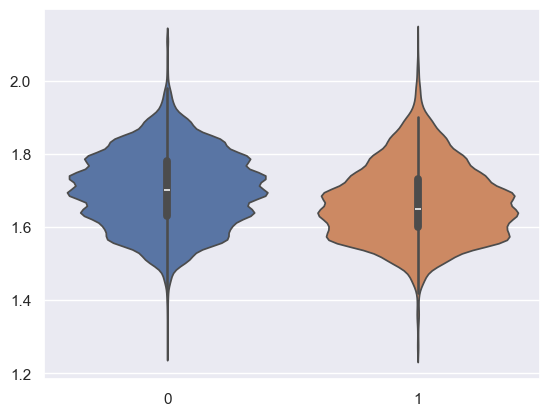

In [30]:
sns.violinplot((h_y, h_n))

plt.plot()

### Exercise 13 - Now, a non-inference task: Determine the number of different options there are in the dataset for the `hours_tv_per_school_day` there are.

In [33]:
yrbss_df["hours_tv_per_school_day"].unique().tolist()

['5+', '2', '3', 'do not watch', '<1', '4', '1', nan]

### Exercise 14 - Come up with a research question evaluating the relationship between height or weight and sleep. Formulate the question in a way that it can be answered using a hypothesis test and/or a confidence interval. Report the statistical results, and also provide an explanation in plain language. Be sure to check all assumptions, state your $\alpha$ level, and conclude in context.

We want to see whether the relationship between weight and night sleep is significant. In particular, we want to check whether the average weight of those who sleep less than 7 hours a night is significantly different from those who sleep more than 7 hours a night. To do so, we need to compare the average weight of those who sleep less than 7 hours a night with the average weight of those who sleep more than 7 hours a night.

In [47]:
sleeps_more = yrbss_df["school_night_hours_sleep"].astype(str).apply(lambda x: np.nan if x == "nan" else (1 if any(i in x for i in ["7", "8", "9", "10"]) else 0)).values

w_filtered = w[~np.isnan(sleeps_more)]
sleeps_more_filtered = sleeps_more[~np.isnan(sleeps_more)]

w_yes = w_filtered[sleeps_more_filtered == 1]
w_no = w_filtered[sleeps_more_filtered == 0]

sps.ttest_ind(w_yes, w_no, nan_policy="omit")

TtestResult(statistic=-4.346342429229877, pvalue=1.3961788482378605e-05, df=11479.0)

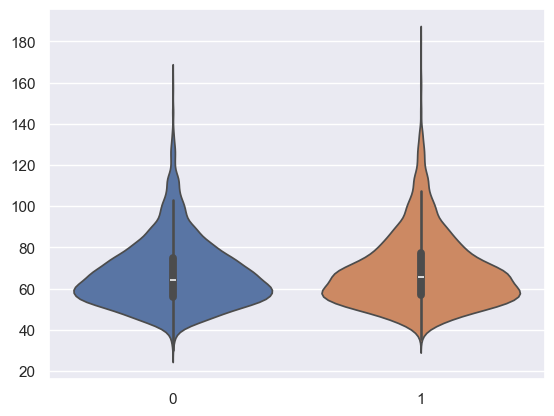

In [48]:
sns.violinplot((w_yes, w_no))

plt.show()

We can conclude that there is no significant difference between the two groups.